**HASOC - sinhala**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import re
import csv

#####Accessing dataset through the drive

In [ ]:
filename = '/content/drive/MyDrive/train_v2.csv'

try:
    train_data = pd.read_csv(filename, delimiter='\t')  # Load data as a DataFrame
except pd.errors.EmptyDataError:
    print("The file is empty or could not be loaded.")
except pd.errors.ParserError as e:
    print(f"Parser Error: {e}")

#####Preview of the dataset and understanding it

In [ ]:
train_data.head()

,post_id,text,label
0,726758237668659201,@USER @USER පට්ට පට පට...,NOT
1,915618589855617026,පරණ කෑල්ල අද වෙනකම් හිටියනම් අදට අවුරුදු 4යි. ...,HOF
2,925001070430040065,යාළුවා කියලා හිතන් සර් ගේ ඔලුවට රෙද්ද දාලා නෙල...,NOT
3,1397219745707986955,හොඳ මිතුරියක් කතා කලා. විස්තර කතාකරමින් ඉදලා ම...,HOF
4,950376113150222336,"ඔය බනින්නෙ.. හරකා, මී හරකා කිය කිය...",HOF


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   post_id  7500 non-null   int64 
 1   text     7500 non-null   object
 2   label    7500 non-null   object
dtypes: int64(1), object(2)
memory usage: 175.9+ KB


#####Cleaning the dataset by removing all mentions, hashtags and other language text.

In [ ]:
def cleaning_text(df, text_field):
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|#|([A-Za-z0-9])|(\.+)|\t.+", "", elem))
  return df

In [ ]:
train = cleaning_text(train_data, "text")

In [ ]:
train

,post_id,text,label
0,726758237668659201,පට්ට පට පට,NOT
1,915618589855617026,පරණ කෑල්ල අද වෙනකම් හිටියනම් අදට අවුරුදු යි යා...,HOF
2,925001070430040065,යාළුවා කියලා හිතන් සර් ගේ ඔලුවට රෙද්ද දාලා නෙල...,NOT
3,1397219745707986955,හොඳ මිතුරියක් කතා කලා විස්තර කතාකරමින් ඉදලා මේ...,HOF
4,950376113150222336,"ඔය බනින්නෙ හරකා, මී හරකා කිය කිය",HOF
...,...,...,...
7495,930270216612872193,අද උදේ දැක්කා පට්ට ලස්සන හීනයක්,NOT
7496,1159471424613969921,කසල වෙන් කරලා දෙන්න පුරුදු වුනොත් වැඩේ ලේසි ...,NOT
7497,1073271775583100928,ඒත් පබාගේ පස්ස නම් ඉස්සෝ කොටුවක් උනත් දාන්න පු...,HOF
7498,1131018244733657088,සුදුවෑන්වලට මාරම මාර බයක් තියෙන ඈයෝ අන්තවාදයට...,HOF


In [ ]:
#saving this in the drive only for the purpose of crosschecking if all the unnecessary info is removed
output_filename = 'train.csv'
train.to_csv(output_filename, index=False, encoding='utf-8')

#####Removing stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords
import requests
stopwords_url = "https://raw.githubusercontent.com/nlpcuom/Sinhala-Stopword-list/master/stop%20words.txt"
response = requests.get(stopwords_url)
stop_words_sinhala = set(response.text.splitlines())
stop_words_sinhala

{'අතර',
 'අන්න',
 'අනුව',
 'අනේ',
 'අඳෝ',
 'අපොයි',
 'අපෝ',
 'අයියෝ',
 'අයුරින්',
 'අයුරු',
 'අරබයා',
 'අහා',
 'ආ',
 'ආයි',
 'ආහ්',
 'ඇති',
 'ඇතුලු',
 'ඇතුළු',
 'ඇයි',
 'ඉක්බිති',
 'ඉතා',
 'ඉතින්',
 'ඉඳුරා',
 'උදෙසා',
 'ඌයි',
 'එ',
 'එනමුත්',
 'එනිසා',
 'එබැවින්',
 'එම',
 'එම්බල',
 'එම්බා',
 'එහෙත්',
 'එහෙන්',
 'එහේ',
 'ඒ',
 'ඔන්න',
 'ඕහෝ',
 'ක',
 'කලී',
 'ක්',
 'කිම',
 'කිම්',
 'ගානෙ',
 'ගැන',
 'ගේ',
 'චික්',
 'චිහ්',
 'චී',
 'ට',
 'තව',
 'තව ',
 'තවත්',
 'තාක්',
 'තුරා',
 'තුරාවට',
 'තුරු',
 'තුලින්',
 'තුවක්',
 'තුළ',
 'තෙක්',
 'ද',
 'දක්වා',
 'දැනට',
 'දැන්',
 'දී',
 'දෝ',
 'දෝහෝ',
 'නම්',
 'නමුත්',
 'නව',
 'නෑ',
 'නිතර',
 'නිති',
 'නිතිත්',
 'නිතොර',
 'නිසා',
 'නිසාවෙන්',
 'නොහොත්',
 'පටන්',
 'පතා',
 'පමණ',
 'පමණින්',
 'පමන',
 'පරිදි',
 'පවා',
 'පාසා',
 'පිණිස',
 'පිළිබඳ',
 'පිළිබඳව',
 'පුන',
 'බඳු',
 'බව',
 'බවට',
 'බවත්',
 'බවද',
 'බවෙන්',
 'බැවින්',
 'බොල',
 'බොහෝ',
 'ම',
 'මගින්',
 'මත',
 'මන්ද',
 'මහ',
 'මහා',
 'මිස',
 'මුත්',
 'මෙතෙක්',
 'මෙන්',
 'මෙන්න',
 'මෙම',
 'මෙයින්',


In [ ]:
def remove_stopwords(df, text_field, stop_words_set):
    df[text_field] = df[text_field].apply(lambda text: ' '.join([word for word in text.split() if word not in stop_words_set]))
    return df
train_clean = remove_stopwords(train, 'text', stop_words_sinhala)
print(train_clean)

                  post_id                                               text  \
0      726758237668659201                                         පට්ට පට පට   
1      915618589855617026  පරණ කෑල්ල අද වෙනකම් හිටියනම් අදට අවුරුදු යි යා...   
2      925001070430040065  යාළුවා කියලා හිතන් සර් ඔලුවට රෙද්ද දාලා නෙලන එ...   
3     1397219745707986955  හොඳ මිතුරියක් කතා කලා විස්තර කතාකරමින් ඉදලා දව...   
4      950376113150222336                   ඔය බනින්නෙ හරකා, මී හරකා කිය කිය   
...                   ...                                                ...   
7495   930270216612872193                    අද උදේ දැක්කා පට්ට ලස්සන හීනයක්   
7496  1159471424613969921   කසල වෙන් කරලා දෙන්න පුරුදු වුනොත් වැඩේ ලේසි වෙයි   
7497  1073271775583100928  ඒත් පබාගේ පස්ස ඉස්සෝ කොටුවක් උනත් දාන්න පුලාම්...   
7498  1131018244733657088  සුදුවෑන්වලට මාරම මාර බයක් තියෙන ඈයෝ අන්තවාදයට ...   
7499  1386977011198046209  වෙනි පෝස්ටුවෙන් පසු මොකක්ද යකෝ ඔය දාල තියෙන්නෙ...   

     label  
0      NOT  
1      HOF  


In [ ]:
!pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [ ]:
def tfidf_feature(df, text_field):
  tfidf_vectorizer = TfidfVectorizer(max_features=1000)
  tfidf_features = tfidf_vectorizer.fit_transform(df[text_field])
  tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
  df_with_tfidf = pd.concat([df, tfidf_df], axis=1)
  return(df_with_tfidf)

new_df = tfidf_feature(train_clean, 'text')
print(new_df)

                  post_id                                               text  \
0      726758237668659201                                         පට්ට පට පට   
1      915618589855617026  පරණ කෑල්ල අද වෙනකම් හිටියනම් අදට අවුරුදු යි යා...   
2      925001070430040065  යාළුවා කියලා හිතන් සර් ඔලුවට රෙද්ද දාලා නෙලන එ...   
3     1397219745707986955  හොඳ මිතුරියක් කතා කලා විස්තර කතාකරමින් ඉදලා දව...   
4      950376113150222336                   ඔය බනින්නෙ හරකා, මී හරකා කිය කිය   
...                   ...                                                ...   
7495   930270216612872193                    අද උදේ දැක්කා පට්ට ලස්සන හීනයක්   
7496  1159471424613969921   කසල වෙන් කරලා දෙන්න පුරුදු වුනොත් වැඩේ ලේසි වෙයි   
7497  1073271775583100928  ඒත් පබාගේ පස්ස ඉස්සෝ කොටුවක් උනත් දාන්න පුලාම්...   
7498  1131018244733657088  සුදුවෑන්වලට මාරම මාර බයක් තියෙන ඈයෝ අන්තවාදයට ...   
7499  1386977011198046209  වෙනි පෝස්ටුවෙන් පසු මොකක්ද යකෝ ඔය දාල තියෙන්නෙ...   

     label   අක  අකම   අග  අගම   අච   අ

In [ ]:
#saving this in the drive only for the purpose of crosschecking if all the necessary info exists
output_filename = 'tfidf.csv'
new_df.to_csv(output_filename, index=False, encoding='utf-8')

In [ ]:
import pandas as pd

# Assuming you already have a DataFrame named 'train_clean'

# Split the DataFrame into training and testing sets
train_1 = train_clean.sample(frac=0.8, random_state=73)
test_1 = train_clean.drop(train_1.index)

# Save the training and testing sets to CSV files
train_1.to_csv('train_1.csv', index=False)
test_1.to_csv('test_1.csv', index=False)

In [ ]:
train_1.head()

,post_id,text,label
1187,748888216367800321,ටහුඩු මම වෝට් කරන්නේ,NOT
4990,711569238549368834,බැට් එකට වදින බෝලයක් බෝලයක් ගානේ පපුවෙ අමාරු හ...,NOT
5159,887722197552308228,යකෝ මගේ බඩුවක් ගන්න ගියා වගේනෙ !,NOT
913,1442439404404949000,බැන්දොත් බඳින්නෙ ඩේසිය වගේ නාකිවෙන්න වෙන්න කෑල...,HOF
5755,1127998077590106112,ඔබතුමා පාලනය අතට ගන්න අපට ඔබ විශ්වාසයි,NOT


In [ ]:
test_1.head()

,post_id,text,label
3,1397219745707986955,හොඳ මිතුරියක් කතා කලා විස්තර කතාකරමින් ඉදලා දව...,HOF
7,715019979393863681,අඩො බර්ත්ඩේ එක දවසේ පු* පලාගන්න ආසද :,HOF
32,1137378811098484736,ෆෝන් එක ඔබ ඔබා ඉන්නෙ නැති එකක් දැක්කමද මංදා ඒක...,NOT
35,1164509759682351104,පුක කියන්නෙත් හොද මාර්කටින් ස්ට්‍රැජික් එකක් තමයි,HOF
38,1089761108985069569,ඩාලින් මම ඔයාටත් ෆේස් ස්ක්‍රබ් එකක් අරම් දෙන්න...,NOT


In [ ]:
from collections import defaultdict as ddict
import csv
label_dict1 = {
    'NOT':0,
    'HOF':1
}

In [ ]:
def load_dataset(df="train_1.csv"):
  lines = []
  with open(df, "r") as f:
    reader = csv.reader(f)
    for line in reader:
      lines.append(line)
    tweet=[]
    label1 =[]
    dic_data = ddict(list)
    for (i,line) in enumerate(lines):
      if i==0:
        continue

      _tweet = line[1]
      _label1 = line[2]

      tweet.append(_tweet)
      label1.append(label_dict1[_label1])
    label_list1 = ["HOF", "NOT"]
    dic_data['tweet']=tweet
    dic_data['label1']=label1
    return dic_data,label_list1

In [ ]:
train_d, label_list1= load_dataset()
print(train_d['label1'][:5])

[0, 0, 0, 1, 0]


In [ ]:
train_d['label1'][:5]

[0, 0, 0, 1, 0]

In [ ]:
data = pd.DataFrame(
    {
        'X' : train_d['tweet'],
        'Y' : train_d['label1']
    }
)

In [ ]:
data

,X,Y
0,ටහුඩු මම වෝට් කරන්නේ,0
1,බැට් එකට වදින බෝලයක් බෝලයක් ගානේ පපුවෙ අමාරු හ...,0
2,යකෝ මගේ බඩුවක් ගන්න ගියා වගේනෙ !,0
3,බැන්දොත් බඳින්නෙ ඩේසිය වගේ නාකිවෙන්න වෙන්න කෑල...,1
4,ඔබතුමා පාලනය අතට ගන්න අපට ඔබ විශ්වාසයි,0
...,...,...
5995,නෙදකින් ගොනාගෙ කට ඉරියන් දවසින් දවස බෙල්ලෙ ගොම...,0
5996,ඒක තැබිලි ගහක්දපොල් ගහක්ද මොනවද අයිසෙ ඔය බලන්න...,0
5997,පුදුම කාලකන්නි ටිකක් ඵනම් උන්ගෙ හිතෙ හමුදාව කි...,0
5998,නැනේ අඩේ උඹට මතක ද? මම එනකං ඉන්නකොට තෝ ඇවිත් ඇ...,0


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [ ]:
texts = data['X'].tolist()
labels = data['Y'].tolist()

In [ ]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [ ]:
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

In [ ]:
labels = np.array(labels)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(units=256, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model architecture summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 79, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 256)               394240    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 1674497 (6.39 MB)
Trainable params: 1674497 (6.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(padded_sequences, labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
75/75 [==============================] - 25s 252ms/step - loss: 0.6493 - accuracy: 0.6250 - val_loss: 0.5613 - val_accuracy: 0.7275
Epoch 2/5
75/75 [==============================] - 16s 213ms/step - loss: 0.3602 - accuracy: 0.8490 - val_loss: 0.4997 - val_accuracy: 0.7783
Epoch 3/5
75/75 [==============================] - 17s 220ms/step - loss: 0.1751 - accuracy: 0.9340 - val_loss: 0.6489 - val_accuracy: 0.7575
Epoch 4/5
75/75 [==============================] - 31s 419ms/step - loss: 0.0863 - accuracy: 0.9696 - val_loss: 0.7982 - val_accuracy: 0.7425
Epoch 5/5
75/75 [==============================] - 15s 200ms/step - loss: 0.0603 - accuracy: 0.9812 - val_loss: 0.9355 - val_accuracy: 0.7233


In [ ]:
# Evaluate the model on the training set
train_predictions = model.predict(padded_sequences)
train_predictions = (train_predictions > 0.5).astype(int)

188/188 [==============================] - 7s 32ms/step


In [ ]:
from sklearn.metrics import accuracy_score, f1_score
train_accuracy = accuracy_score(labels, train_predictions)
train_f1 = f1_score(labels, train_predictions)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Training F1 Score: {train_f1:.4f}')

Training Accuracy: 0.9368
Training F1 Score: 0.9252


In [ ]:
label_dict1 = {
    'NOT':0,
    'HOF':1
}
def load_dataset_test(df="test_1.csv"):
  lines = []
  with open(df, "r") as f:
    reader = csv.reader(f)
    for line in reader:
      lines.append(line)
    tweet=[]
    label1 =[]
    dic_data = ddict(list)
    for (i,line) in enumerate(lines):
      if i==0:
        continue

      _tweet = line[1]
      _label1 = line[2]

      tweet.append(_tweet)
      label1.append(label_dict1[_label1])
    label_list1 = ["HOF", "NOT"]
    dic_data['tweet']=tweet
    dic_data['label1']=label1
    return dic_data,label_list1
test_d, label_list1= load_dataset_test()
print(test_d['label1'][:5])

[1, 1, 0, 1, 0]


In [ ]:
data_test = pd.DataFrame(
    {
        'X' : test_d['tweet'],
        'Y' : test_d['label1']
    }
)
test_texts = data_test['X'].tolist()
test_labels = data_test['Y'].tolist()
test_sequences = tokenizer.texts_to_sequences(test_texts)
padded_test_sequences = pad_sequences(test_sequences, maxlen=max_sequence_length)
test_labels = np.array(test_labels)
test_predictions = model.predict(padded_test_sequences)
test_predictions = (test_predictions > 0.5).astype(int)

47/47 [==============================] - 1s 25ms/step


In [ ]:
test_accuracy = accuracy_score(test_labels, test_predictions)
test_f1 = f1_score(test_labels, test_predictions)

print(f'Testing Accuracy: {test_accuracy:.4f}')
print(f'Testing F1 Score: {test_f1:.4f}')

Testing Accuracy: 0.7347
Testing F1 Score: 0.6934


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(Dense(units=1, activation='sigmoid'))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))  # Additional LSTM layer
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 79, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 79, 128)           131584    
                                                                 
 dense (Dense)               (None, 79, 1)             129       
                                                                 
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1428674 (5.45 MB)
Trainable params: 1428674 (5.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import tensorflow as tf

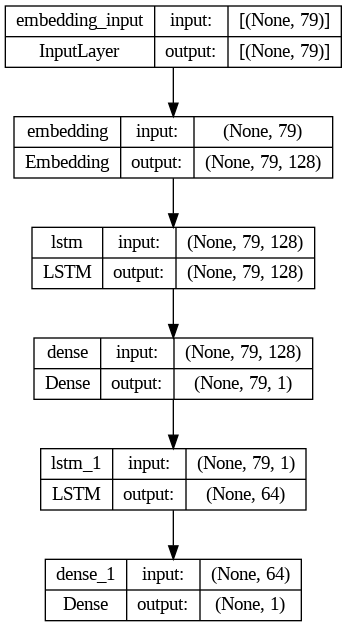

In [ ]:
img_file = './stackLSTM_1.png'

tf.keras.utils.plot_model(model, to_file=img_file, show_shapes=True, show_layer_names=True)

In [ ]:
model.fit(padded_sequences, labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
75/75 [==============================] - 49s 581ms/step - loss: 0.6732 - accuracy: 0.5879 - val_loss: 0.6570 - val_accuracy: 0.6017
Epoch 2/5
75/75 [==============================] - 41s 554ms/step - loss: 0.6594 - accuracy: 0.5944 - val_loss: 0.6823 - val_accuracy: 0.5742
Epoch 3/5
75/75 [==============================] - 31s 417ms/step - loss: 0.6799 - accuracy: 0.5817 - val_loss: 0.6822 - val_accuracy: 0.5742
Epoch 4/5
75/75 [==============================] - 28s 368ms/step - loss: 0.6803 - accuracy: 0.5817 - val_loss: 0.6821 - val_accuracy: 0.5742
Epoch 5/5
75/75 [==============================] - 28s 373ms/step - loss: 0.6805 - accuracy: 0.5817 - val_loss: 0.6821 - val_accuracy: 0.5742


In [ ]:
train_predictions = model.predict(padded_sequences)
train_predictions = (train_predictions > 0.5).astype(int)
train_accuracy = accuracy_score(labels, train_predictions)
train_f1 = f1_score(labels, train_predictions)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Training F1 Score: {train_f1:.4f}')

188/188 [==============================] - 12s 59ms/step
Training Accuracy: 0.5802
Training F1 Score: 0.0000


In [ ]:
test_predictions = model.predict(padded_test_sequences)
test_predictions = (test_predictions > 0.5).astype(int)
test_accuracy = accuracy_score(test_labels, test_predictions)
test_f1 = f1_score(test_labels, test_predictions)

print(f'Testing Accuracy: {test_accuracy:.4f}')
print(f'Testing F1 Score: {test_f1:.4f}')

47/47 [==============================] - 2s 51ms/step
Testing Accuracy: 0.5620
Testing F1 Score: 0.0000


In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

model = Sequential()

# Add an Embedding layer
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length))

# Add a Conv1D layer
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Add an LSTM layer
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
# Add Dense layers
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 79, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 75, 64)            41024     
                                                                 
 max_pooling1d (MaxPooling1  (None, 37, 64)            0         
 D)                                                              
                                                                 
 lstm_2 (LSTM)               (None, 128)               98816     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                      

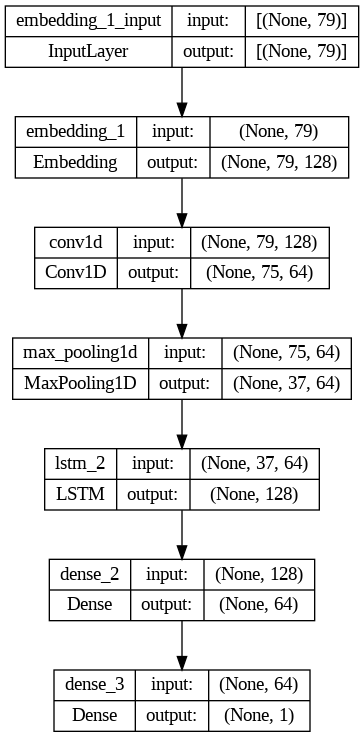

In [ ]:
img_file = './LSTMCNN_1.png'

tf.keras.utils.plot_model(model, to_file=img_file, show_shapes=True, show_layer_names=True)

In [ ]:
model.fit(padded_sequences, labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
75/75 [==============================] - 26s 233ms/step - loss: 0.6561 - accuracy: 0.6142 - val_loss: 0.5695 - val_accuracy: 0.7208
Epoch 2/5
75/75 [==============================] - 12s 154ms/step - loss: 0.3927 - accuracy: 0.8333 - val_loss: 0.5470 - val_accuracy: 0.7500
Epoch 3/5
75/75 [==============================] - 10s 138ms/step - loss: 0.1697 - accuracy: 0.9344 - val_loss: 0.7630 - val_accuracy: 0.7425
Epoch 4/5
75/75 [==============================] - 8s 108ms/step - loss: 0.0813 - accuracy: 0.9688 - val_loss: 1.0513 - val_accuracy: 0.7375
Epoch 5/5
75/75 [==============================] - 9s 118ms/step - loss: 0.0455 - accuracy: 0.9823 - val_loss: 1.2987 - val_accuracy: 0.7142


In [ ]:
train_predictions = model.predict(padded_sequences)
train_predictions = (train_predictions > 0.5).astype(int)
train_accuracy = accuracy_score(labels, train_predictions)
train_f1 = f1_score(labels, train_predictions)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Training F1 Score: {train_f1:.4f}')

188/188 [==============================] - 3s 13ms/step
Training Accuracy: 0.9338
Training F1 Score: 0.9190


In [ ]:
test_predictions = model.predict(padded_test_sequences)
test_predictions = (test_predictions > 0.5).astype(int)
test_accuracy = accuracy_score(test_labels, test_predictions)
test_f1 = f1_score(test_labels, test_predictions)

print(f'Testing Accuracy: {test_accuracy:.4f}')
print(f'Testing F1 Score: {test_f1:.4f}')

47/47 [==============================] - 1s 15ms/step
Testing Accuracy: 0.7293
Testing F1 Score: 0.6577


In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

model = Sequential()

# Add an Embedding layer
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length))

# Add a Conv1D layer
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 79, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 75, 64)            41024     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 37, 64)            0         
 g1D)                                                            
                                                                 
 lstm_3 (LSTM)               (None, 128)               98816     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1419969 (5.42 MB)
Trainable params: 1419969 (5.42 MB)
Non-trainable params: 0 (0.00 Byte)
________________

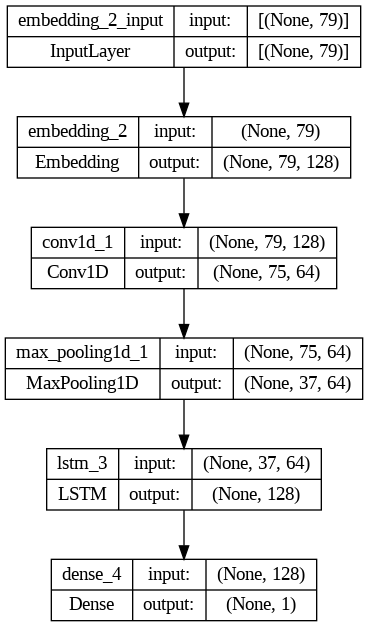

In [ ]:
img_file = './LSTMCNN_2.png'

tf.keras.utils.plot_model(model, to_file=img_file, show_shapes=True, show_layer_names=True)

In [ ]:
model.fit(padded_sequences, labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
75/75 [==============================] - 22s 243ms/step - loss: 0.6545 - accuracy: 0.6200 - val_loss: 0.5740 - val_accuracy: 0.7183
Epoch 2/5
75/75 [==============================] - 14s 183ms/step - loss: 0.3862 - accuracy: 0.8352 - val_loss: 0.5358 - val_accuracy: 0.7567
Epoch 3/5
75/75 [==============================] - 10s 127ms/step - loss: 0.1729 - accuracy: 0.9302 - val_loss: 0.7250 - val_accuracy: 0.7342
Epoch 4/5
75/75 [==============================] - 10s 131ms/step - loss: 0.0935 - accuracy: 0.9654 - val_loss: 0.9672 - val_accuracy: 0.7233
Epoch 5/5
75/75 [==============================] - 7s 93ms/step - loss: 0.0537 - accuracy: 0.9781 - val_loss: 1.3042 - val_accuracy: 0.7283


In [ ]:
train_predictions = model.predict(padded_sequences)
train_predictions = (train_predictions > 0.5).astype(int)
train_accuracy = accuracy_score(labels, train_predictions)
train_f1 = f1_score(labels, train_predictions)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Training F1 Score: {train_f1:.4f}')

188/188 [==============================] - 3s 16ms/step
Training Accuracy: 0.9342
Training F1 Score: 0.9204


In [ ]:
test_predictions = model.predict(padded_test_sequences)
test_predictions = (test_predictions > 0.5).astype(int)
test_accuracy = accuracy_score(test_labels, test_predictions)
test_f1 = f1_score(test_labels, test_predictions)

print(f'Testing Accuracy: {test_accuracy:.4f}')
print(f'Testing F1 Score: {test_f1:.4f}')

47/47 [==============================] - 1s 12ms/step
Testing Accuracy: 0.7280
Testing F1 Score: 0.6667


Adding word2vec

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
nltk.download('punkt')
text_data = data['X'].tolist()
sentences = [sent_tokenize(text) for text in text_data]
train_texts = []
for sentence_list in sentences:
    sentence_words = []
    for sentence in sentence_list:
        sentence_words.extend(word_tokenize(sentence))
    train_texts.append(sentence_words)
word2vec_model = Word2Vec(sentences=train_texts, vector_size=300, window=5, min_count=1, sg=0)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Create a Tokenizer and fit on the text data
tokenizer = Tokenizer(num_words=10000)  # Adjust the vocabulary size if needed
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index

In [ ]:
embedding_matrix = np.zeros((len(word_index) + 1, 300))  # 300 is the dimensionality of Word2Vec embeddings

for word, i in word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

embedding_layer = Embedding(input_dim=len(word_index) + 1,
                            output_dim=300,  # Use the same dimensionality as your Word2Vec embeddings
                            weights=[embedding_matrix],
                            input_length=max_sequence_length,
                            trainable=False)  # Set to False to keep the custom embeddings fixed

model = Sequential()
model.add(embedding_layer)
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 79, 300)           7678800   
                                                                 
 conv1d_2 (Conv1D)           (None, 75, 64)            96064     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 37, 64)            0         
 g1D)                                                            
                                                                 
 lstm_4 (LSTM)               (None, 128)               98816     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                      

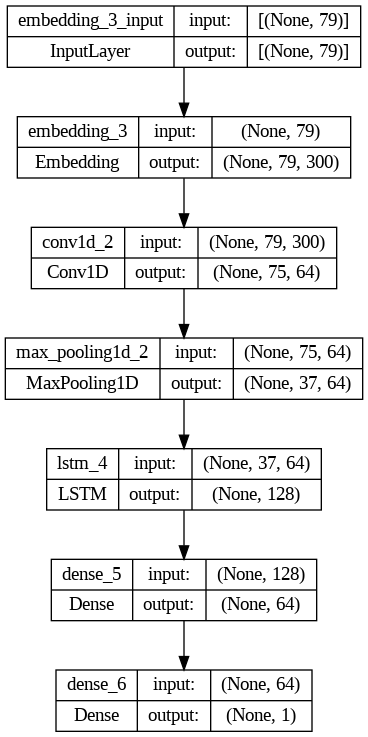

In [ ]:
img_file = './LSTMCNN_3.png'

tf.keras.utils.plot_model(model, to_file=img_file, show_shapes=True, show_layer_names=True)

In [ ]:
model.fit(padded_sequences, labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
75/75 [==============================] - 9s 74ms/step - loss: 0.6762 - accuracy: 0.5860 - val_loss: 0.6698 - val_accuracy: 0.5908
Epoch 2/5
75/75 [==============================] - 6s 76ms/step - loss: 0.6695 - accuracy: 0.5858 - val_loss: 0.6713 - val_accuracy: 0.5742
Epoch 3/5
75/75 [==============================] - 6s 79ms/step - loss: 0.6688 - accuracy: 0.5842 - val_loss: 0.6685 - val_accuracy: 0.5925
Epoch 4/5
75/75 [==============================] - 5s 67ms/step - loss: 0.6670 - accuracy: 0.5917 - val_loss: 0.6699 - val_accuracy: 0.5867
Epoch 5/5
75/75 [==============================] - 6s 85ms/step - loss: 0.6665 - accuracy: 0.5838 - val_loss: 0.6683 - val_accuracy: 0.5858


In [ ]:
# Evaluate the model on the training set
train_predictions = model.predict(padded_sequences)
train_predictions = (train_predictions > 0.5).astype(int)

188/188 [==============================] - 2s 11ms/step


In [ ]:
from sklearn.metrics import accuracy_score, f1_score
train_accuracy = accuracy_score(labels, train_predictions)
train_f1 = f1_score(labels, train_predictions)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Training F1 Score: {train_f1:.4f}')

Training Accuracy: 0.5938
Training F1 Score: 0.1976


In [ ]:
data_test = pd.DataFrame(
    {
        'X' : test_d['tweet'],
        'Y' : test_d['label1']
    }
)
test_texts = data_test['X'].tolist()
test_labels = data_test['Y'].tolist()
test_sequences = tokenizer.texts_to_sequences(test_texts)
padded_test_sequences = pad_sequences(test_sequences, maxlen=max_sequence_length)
test_labels = np.array(test_labels)
test_predictions = model.predict(padded_test_sequences)
test_predictions = (test_predictions > 0.5).astype(int)

47/47 [==============================] - 1s 16ms/step


In [ ]:
test_accuracy = accuracy_score(test_labels, test_predictions)
test_f1 = f1_score(test_labels, test_predictions)

print(f'Testing Accuracy: {test_accuracy:.4f}')
print(f'Testing F1 Score: {test_f1:.4f}')

Testing Accuracy: 0.5760
Testing F1 Score: 0.1783


In [ ]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(input_dim=len(word_index) + 1,
                            output_dim=300,  # Use the same dimensionality as your Word2Vec embeddings
                            weights=[embedding_matrix],
                            input_length=max_sequence_length,
                            trainable=False)  # Set to False to keep the custom embeddings fixed

model1 = Sequential()
model1.add(embedding_layer)
model1.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))

model1.add(Dense(units=1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 79, 300)           7678800   
                                                                 
 lstm_5 (LSTM)               (None, 128)               219648    
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 7898577 (30.13 MB)
Trainable params: 219777 (858.50 KB)
Non-trainable params: 7678800 (29.29 MB)
_________________________________________________________________


In [ ]:
model1.fit(padded_sequences, labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
75/75 [==============================] - 12s 137ms/step - loss: 0.6795 - accuracy: 0.5750 - val_loss: 0.6702 - val_accuracy: 0.5975
Epoch 2/5
75/75 [==============================] - 16s 214ms/step - loss: 0.6719 - accuracy: 0.5927 - val_loss: 0.6723 - val_accuracy: 0.5742
Epoch 3/5
75/75 [==============================] - 10s 131ms/step - loss: 0.6655 - accuracy: 0.5904 - val_loss: 0.6724 - val_accuracy: 0.5942
Epoch 4/5
75/75 [==============================] - 8s 112ms/step - loss: 0.6652 - accuracy: 0.5958 - val_loss: 0.6681 - val_accuracy: 0.5783
Epoch 5/5
75/75 [==============================] - 10s 133ms/step - loss: 0.6639 - accuracy: 0.5927 - val_loss: 0.6665 - val_accuracy: 0.5883


In [ ]:
train_predictions = model1.predict(padded_sequences)
train_predictions = (train_predictions > 0.5).astype(int)
train_accuracy = accuracy_score(labels, train_predictions)
train_f1 = f1_score(labels, train_predictions)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Training F1 Score: {train_f1:.4f}')

188/188 [==============================] - 5s 25ms/step
Training Accuracy: 0.5942
Training F1 Score: 0.4128


In [ ]:
test_predictions = model1.predict(padded_test_sequences)
test_predictions = (test_predictions > 0.5).astype(int)
test_accuracy = accuracy_score(test_labels, test_predictions)
test_f1 = f1_score(test_labels, test_predictions)

print(f'Testing Accuracy: {test_accuracy:.4f}')
print(f'Testing F1 Score: {test_f1:.4f}')

47/47 [==============================] - 1s 21ms/step
Testing Accuracy: 0.5773
Testing F1 Score: 0.4097


In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

model2 = Sequential()

# Add an Embedding layer
model2.add(Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length))

# Add a Conv1D layer
model2.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model2.add(MaxPooling1D(pool_size=2))

model2.add(LSTM(units=256, dropout=0.5, recurrent_dropout=0.5))

model2.add(Dense(units=1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 79, 128)           1280000   
                                                                 
 conv1d_4 (Conv1D)           (None, 75, 64)            41024     
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 37, 64)            0         
 g1D)                                                            
                                                                 
 lstm_6 (LSTM)               (None, 256)               328704    
                                                                 
 dense_8 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1649985 (6.29 MB)
Trainable params: 1649985 (6.29 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
model2.fit(padded_sequences, labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
75/75 [==============================] - 13s 174ms/step - loss: 0.6145 - accuracy: 0.6610 - val_loss: 0.5485 - val_accuracy: 0.7392
Epoch 2/5
75/75 [==============================] - 9s 123ms/step - loss: 0.3411 - accuracy: 0.8573 - val_loss: 0.5624 - val_accuracy: 0.7467
Epoch 3/5
75/75 [==============================] - 9s 114ms/step - loss: 0.1540 - accuracy: 0.9383 - val_loss: 0.7918 - val_accuracy: 0.7317
Epoch 4/5
75/75 [==============================] - 9s 121ms/step - loss: 0.0789 - accuracy: 0.9677 - val_loss: 1.1984 - val_accuracy: 0.7233
Epoch 5/5
75/75 [==============================] - 6s 86ms/step - loss: 0.0489 - accuracy: 0.9808 - val_loss: 1.2807 - val_accuracy: 0.7250


In [ ]:
train_predictions = model2.predict(padded_sequences)
train_predictions = (train_predictions > 0.5).astype(int)
train_accuracy = accuracy_score(labels, train_predictions)
train_f1 = f1_score(labels, train_predictions)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Training F1 Score: {train_f1:.4f}')

188/188 [==============================] - 2s 11ms/step
Training Accuracy: 0.9365
Training F1 Score: 0.9248


In [ ]:
test_predictions = model2.predict(padded_test_sequences)
test_predictions = (test_predictions > 0.5).astype(int)
test_accuracy = accuracy_score(test_labels, test_predictions)
test_f1 = f1_score(test_labels, test_predictions)

print(f'Testing Accuracy: {test_accuracy:.4f}')
print(f'Testing F1 Score: {test_f1:.4f}')

47/47 [==============================] - 1s 31ms/step
Testing Accuracy: 0.7227
Testing F1 Score: 0.6858
